Resizing/ Downscaling Method: 
In  this method  firstly  I  have  fetched the  color  image  dataset  from  google drive  into  and  getting  the 
accessing links for both the train and test data sets. I have used OpenCV in order to read and resize 
the images to a base scale as all images are in different sizes. I have taken the base size as  244 and 
resized  to  the  base  size.  I  have split  my  train  data  set  into  training  and  validation  data  set  with  the 
validation data size as 20%, which helps me to fix overfitting problem. Firstly, I have fed this data to 
my  CNN  network  and  plotted  the  confusion  matrix  and  calculated  the  test  accuracy  for  the  model. 
The same data was again fed to our transfer learning model VGG-16 in which I have made all the 
above/top layers first as untrainable and added dense layer as the output layer which will be tailored 
to our classes of images and generated confusion matrix and test accuracies. I have repeated the same 
experiment for the sizes of 150,32 and 10 which reduces the image data and generated deliverables 
which are utilized for our observations to learn impact. We are also tracking the graphical 
representation of train and validation accuracies and losses. 

In [ ]:
## Importing all the necessary libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
## Mounting drive inorder to read data
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/drive/My Drive/training'
test_path = '/content/drive/My Drive/testing'

Mounted at /content/gdrive


In [ ]:
## Fetching the train images and label information
trainimages = []  
trainlabels =[]     
i = 0
for folder in os.listdir('gdrive/My Drive/training'):
  train_path = 'gdrive/My Drive/training/'+folder
  for filename in os.listdir(train_path):
        
        image_path = train_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(244,244))

        trainlabels.append(i)
        
        trainimages.append(img)
  i=i+1

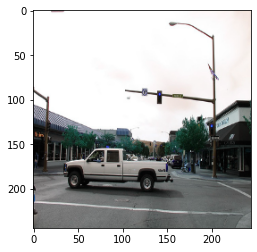

In [ ]:
plt.imshow(trainimages[2122])

In [ ]:
## Fetching the test images and label information
testimages = []  
testlabels =[]     
j = 0
for folder in os.listdir('gdrive/My Drive/testing'):
  test_path = 'gdrive/My Drive/testing/'+folder
  for filename in os.listdir(test_path):
        
        image_path = test_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(244,244))

        testlabels.append(j)
        
        testimages.append(img)
  j=j+1


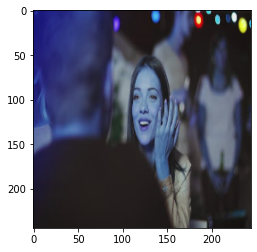

In [ ]:
plt.imshow(testimages[540])
plt.show()

In [ ]:
## Converting into array and normalize
trainimages = np.array(trainimages)
trainimages = trainimages/255.0
trainlabels=np.array(trainlabels)
testimages = np.array(testimages)
testimages = testimages/255.0
testlabels=np.array(testlabels)

In [ ]:
testlabels=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
             3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,
11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,
12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,
15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,
13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,
14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,
]

In [ ]:
## Spliting Train and Validation data
trainimages, valimages, trainlabels, vallabels = train_test_split(trainimages, trainlabels, test_size=0.2, shuffle=True)

In [ ]:
## Creating model for our CNN

regularizer = regularizers.l1(l=0.001) 
model = Sequential()
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizer,input_shape=(244,244,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(19))
model.add(Activation('softmax'))

## Compiling the model 
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()
## Fitting the model
history=model.fit(trainimages, trainlabels, batch_size=30, epochs=10, validation_data=(valimages, vallabels),shuffle='False')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 64)      1792      
                                                                 
 activation (Activation)     (None, 242, 242, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 21s 195ms/step - loss: 4.9438 - accuracy: 0.1333 - val_loss: 2.7524 - val_accuracy: 0.1596
Epoch 2/10
60/60 [==============================] - 10s 165ms/step - loss: 2.2509 - accuracy: 0.3690 - val_loss: 2.9543 - val_accuracy: 0.2112
Epoch 3/10
60/60 [==============================] - 10s 166ms/step - loss: 1.1029 - accuracy: 0.7233 - val_loss: 2.8371 - val_accuracy: 0.2809
Epoch 4/10
60/60 [==============================] - 10s 165ms/step - loss: 0.3443 - accuracy: 0.9415 - val_loss: 3.7089 - val_accuracy: 0.2584
Epoch 5/10
60/60 [==============================] - 10s 166ms/step - loss: 0.1868 - accuracy: 0.9786 - val_loss: 4.2168 - val_accuracy: 0.2787
Epoch 6/10
60/60 [==============================] - 10s 166ms/step - loss: 0.1018 - accuracy: 0.9955 - val_loss: 4.5308 - val_accuracy: 0.2584
Epoch 7/10
60/60 [==============================] - 10s 166ms/step - loss: 0.1019 - accuracy: 0.9978 - val_loss: 4.6857 - val_accuracy: 0.2944
Epoch 8/10

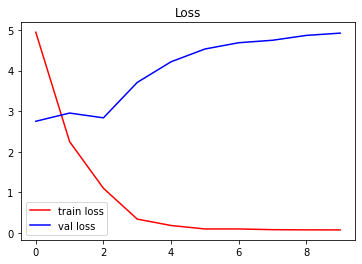

In [ ]:
## Training Loss Vs Validation Loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()


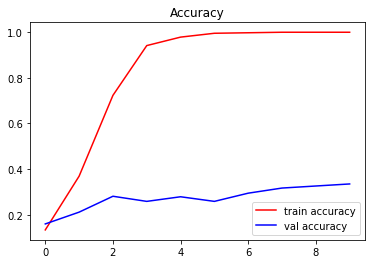

In [ ]:
## Plotting the Train Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

[[13  0  0  0  0  5  0  0  1  0  1  1  0  1  2  0  4  0  2]
 [ 1 15  0  0  0  1  0  0  0  0  0  4  2  0  2  2  3  0  0]
 [ 1  0 18  2  2  0  1  0  0  2  0  0  1  0  0  0  2  1  0]
 [ 2  0  2  2  0  3  2  0  0  3  0  4  0  0  1  4  2  2  3]
 [ 3  0  1  3 15  0  0  0  3  2  0  0  0  0  1  0  0  2  0]
 [ 3  4  0  0  1  3  0  0  2  0  1  4  2  1  1  1  6  0  1]
 [ 0  1  0  0  0  0  8  0  2  0  2  1  0 13  0  3  0  0  0]
 [ 2  2  0  0  4  0  0  5  0  1  2  3  1  0  3  1  4  1  1]
 [ 1  1  4  3  0  0  0  0  6  5  1  2  2  0  0  2  2  1  0]
 [ 0  2  4  1  5  0  0  0  3  7  1  2  2  0  0  1  1  1  0]
 [ 1  2  0  1  3  3  1  1  6  0  7  3  0  2  0  0  0  0  0]
 [ 1  0  0  1  1  0  1  0  3  0  1  6  4  0  2  0  9  1  0]
 [ 1  2  1  0  0  2  1  0  6  0  2  1  1  0  2  0 10  1  0]
 [ 0  0  0  0  1  1  5  1  1  0  1  1  0 16  0  2  0  0  1]
 [ 2  2  0  1  3  4  0  3  1  0  0  4  2  0  2  1  2  0  3]
 [ 3  0  0  2  1  0  0  0  0  2  0  0  0  0  1 16  1  1  3]
 [ 7  0  0  1  0  3  0  1  1  1  3  0  5

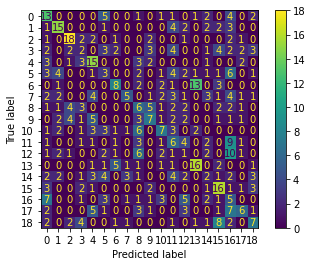

In [ ]:
## Plotting the Confusion matrix and Evaluvating the test accuracy
y_pred1 = model.predict(testimages)
y_pred1 = np.argmax(y_pred1, axis=1)
cm = confusion_matrix(testlabels, y_pred1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
## Test Accuracy
print(accuracy_score(testlabels, y_pred1))

In [ ]:
## Pulling VGG16 weights
vgg = VGG16(input_shape=(244,244,3), weights='imagenet', include_top=False)
## Making all the above layers intrainable
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
pred = Dense(19, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=pred)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
# fit the model
history = model.fit(trainimages,trainlabels,validation_data=(valimages, vallabels),epochs=10,batch_size=32)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

Epoch 1/10
56/56 [==============================] - 41s 634ms/step - loss: 1.6398 - accuracy: 0.5399 - val_loss: 0.8144 - val_accuracy: 0.7348
Epoch 2/10
56/56 [==============================] - 26s 468ms/step - loss: 0.1983 - accuracy: 0.9471 - val_loss: 0.7296 - val_accuracy: 0.7640
Epoch 3/10
56/56 [==============================] - 26s 468ms/step - loss: 0.0664 - accuracy: 0.9949 - val_loss: 0.7163 - val_accuracy: 0.7708
Epoch 4/10
56/56 [==============================] - 26s 469ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.6787 - val_accuracy: 0.7820
Epoch 5/10
56/56 [==============================] - 26s 468ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.6638 - val_accuracy: 0.7865
Epoch 6/10
56/56 [==============================] - 26s 469ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.6524 - val_accuracy: 0.7843
Epoch 7/10
56/56 [==============================] - 26s 468ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.6664 - val_accuracy: 0.7798

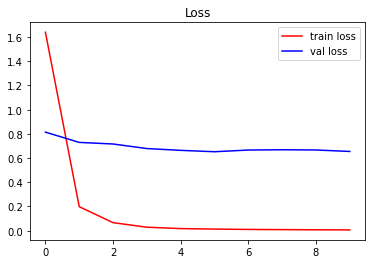

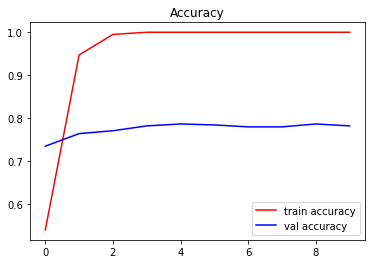

[[25  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  2  0  0]
 [ 0 25  0  0  1  0  0  0  0  0  0  1  0  0  2  0  1  0  0]
 [ 0  1 27  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  1  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0 26  0  0  0  0  1  0  0  0  0  0  0  1  2  0]
 [ 3  0  0  0  0 18  0  0  0  0  0  0  1  0  1  0  6  1  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0 18  0  1  0  0  0  0  1  0  3  3  0]
 [ 0  0  0  0  0  1  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  1  0  1 23  0  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  1  0  0  0 25  0  0  1  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 22  0  0  7  0  0  0  0]
 [ 2  0  0  0  0  3  0  0  0  0  0  2 20  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  1  2  0  0  0  1  2  5  0  0 18  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0]
 [ 1  1  0  0  1  2  0  1  0  0  0  0  1

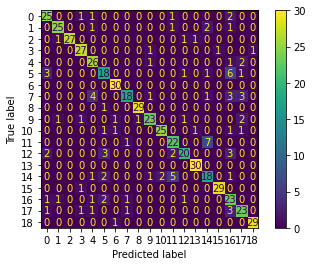

In [ ]:
## Plotting graphs of Training loss Vs Validation loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()
## Plotting graphs of Training Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(testlabels, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(testlabels, y_pred))
